# Binding Energy
## Computational Nuclear Physics
### Project 2

### Papadopoulou Martha

### Import Libraries

In [1]:
import sympy as sp
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Define Constant Values

In [2]:
hbar_c = 197.327 # MeV * fermi

# masses
mp = 938.272 # MeV
mn = 939.565 # MeV

# empirical constants
a_n = 15.71511 # MeV
a_s = 17.53638 # MeV
a_c = 0.71363 # MeV
a_a = 23.37837  # MeV

# lattice constant
C_l = 3.40665 * 10**(-3)

# Validation of the Enegry Minimazation Process in an Isolated Nucleus

### Define Nucleus Energy

In [3]:
# x ≡ A^(1/3) and y ≡ Z/A
# Define x and y as symbolic variables
x, y = sp.symbols('x y', real=True, positive=True)

# Define energy function
e_n = mp*y + mn*(1-y) - a_n + a_s/x + a_c*x**2*y**2 + a_a*(1-2*y)**2 

### Compute the Derivatives

In [4]:
den_dx = sp.diff(e_n, x)
den_dy = sp.diff(e_n, y)

# Print derivatives for validation
print("∂e_n/∂x =", den_dx)
print("∂e_n/∂y =", den_dy)

∂e_n/∂x = 1.42726*x*y**2 - 17.53638/x**2
∂e_n/∂y = 1.42726*x**2*y + 187.02696*y - 94.80648


### Solve the System of Equations from the Partial Derivatives

In [5]:
solutions = sp.solve([den_dx, den_dy], (x, y), dict=True)
print(solutions)

[{x: 3.90612256142565, y: 0.454045763398788}, {x: 358.382897353014, y: 0.000516651283091249}]


### Calculate Mass Number A and Atomic Number Z

In [6]:
def cal_A_Z(x, y):
    A = x**3
    Z = y * A
    return A, Z

In [7]:
# Calculate A and Z for first set of results
x_1 = solutions[0][x]
y_1 = solutions[0][y]
A_1, Z_1 = cal_A_Z(x_1, y_1)
print(f"Solution 1: x_1 = {x_1:.3f}, y_1 = {y_1:.3f}")
print(f"A_1 = {A_1:.3f}, Z_1 = {Z_1:.3f} \n")

# Calculate A and Z for second set of results
x_2 = solutions[1][x]
y_2 = solutions[1][y]
A_2, Z_2 = cal_A_Z(x_2, y_2)
print(f"Solution 2: x_2 = {x_2:.3f}, y_2 = {y_2:.3f}")
print(f"A_2 = {A_2:.3f}, Z_2 = {Z_2:.3f}")

Solution 1: x_1 = 3.906, y_1 = 0.454
A_1 = 59.599, Z_1 = 27.061 

Solution 2: x_2 = 358.383, y_2 = 0.001
A_2 = 46030090.485, Z_2 = 23781.505


### Calculate Additional Validation Values

In [8]:
def cal_add_val(A, Z):
    N = A - Z
    B = a_n*int(A) - a_s*int(A)**(2/3) - a_c*int(Z)*(int(Z)-1)/(int(A)**(1/3)) - a_a*(int(N) - int(Z))**2/int(A)
    B_A = B/int(A)
    M = int(N)*mn + int(Z)*mp - B
    m = M/int(A) 
    return N, B_A, m 

In [9]:
# Solution 1 is the only valid solution 
# Caclulate N, B/A and m values for solution 1 
N_1, B_A_1, m_1 = cal_add_val(A_1, Z_1)
print(f"N_1 = {N_1:.3f}, (B/A)_1 = {B_A_1:.3f}, m_1 = {m_1:.3f}")

N_1 = 32.538, (B/A)_1 = 8.862, m_1 = 930.112


# Nucleus in an Electronic and Lattice Enviroment

### Full Expression of the Nuclear Energy 

In [10]:
# Define p_f as symbolic variable
p_f = sp.symbols('p_f', real=True, positive=True)

# Define full energy function
e = e_n + p_f*y**(4/3)*3/4 - C_l*x**2*y**2*p_f

### Compute the Derivatives

In [11]:
de_dx = sp.diff(e, x)
de_dy = sp.diff(e, y)

# Print derivatives for validation
print("∂e/∂x =", de_dx)
print("∂e/∂y =", de_dy)

∂e/∂x = -0.0068133*p_f*x*y**2 + 1.42726*x*y**2 - 17.53638/x**2
∂e/∂y = -0.0068133*p_f*x**2*y + 1.0*p_f*y**0.333333333333333 + 1.42726*x**2*y + 187.02696*y - 94.80648


### Solve the System of Equations from the Partial Derivatives

In [12]:
# The solution of the above system of equations is difficult. To simplify the computation 
# we approximate the solution to first order by replacing x and y with the folowing:
# x(p_f) = x_1 (1 + ksi) 
# y(p_f) = y_1 (1 + eta)
# where ksi and eta represent small deviations from the zero-density results.

# Define ksi and eta as symbolic variables
ksi, eta = sp.symbols('ksi eta', real=True)

# Define x(p_f) and y(p_f) functions
x_pf = x_1 * (1+ksi)
y_pf = y_1 * (1+eta)

# Substitute derivatives' x and y with x(p_f) and y(p_f)
de_dx_sub = de_dx.subs({x:x_pf, y:y_pf})
de_dy_sub = de_dy.subs({x:x_pf, y:y_pf})

In [13]:
# Expand expressions to later remove terms with squared powers
de_dx_expand = sp.expand(de_dx_sub)
de_dy_expand = sp.expand(de_dy_sub)

# Remove terms that involving squared powers of ksi, eta and their product, as they are functions of p_f
de_dx_approx = de_dx_expand.subs({ksi**2: 0, eta**2: 0, ksi*eta: 0})
de_dy_approx = de_dy_expand.subs({ksi**2: 0, eta**2: 0, ksi*eta: 0})

# Print derivatives to see their current form
print("∂e/∂x =", de_dx_approx, "\n")
print("∂e/∂y =", de_dy_approx)

∂e/∂x = -0.0109731831778588*eta*p_f + 2.29867838234494*eta - 0.00548659158892941*ksi*p_f + 1.14933919117247*ksi - 0.00548659158892941*p_f + 1.14933919117247 - 1.14933919117247/(2*ksi + 1) 

∂e/∂y = -0.0472007469696887*eta*p_f + 94.80648*eta - 0.0944014939393774*ksi*p_f + 19.7753623412907*ksi + 0.768599107648547*p_f*(eta + 1)**0.333333333333333 - 0.0472007469696887*p_f - 1.77635683940025e-15


In [14]:
# The derivatives above still contain non-linear terms like 1/(2*ksi + 1) and (eta + 1)**(1/3), which make the
# system of equations difficult for the sp.sovle function. Since we are aiming for a first-order approximation
# and ksi, eta are small quantities, we replace these terms with their first-order Taylor expansions rather
# than removing them entirely.

# Replace 1/(2*ksi + 1) with its first-order Taylor approximation
de_dx_approx2 = de_dx_approx.subs(1/(2*ksi + 1), sp.series(1/(2*ksi + 1), ksi, 0, 2).removeO())

# Manually remove (eta + 1)**(1/3) since symbolic matching doesn't catch it for substitution
terms = sp.Add.make_args(de_dy_approx)
filtered_terms = [t for t in terms if not t.has(eta + 1)]

# Add the rest of the term along with the first-order Taylor approximation of (1 + eta)**(1/3)
de_dy_approx2 = sp.Add(*filtered_terms) +  0.768599107648547*p_f*sp.series((eta + 1)**(1/3), eta, 0, 2).removeO()

print("∂e/∂x =",de_dx_approx2, "\n")
print("∂e/∂y =",de_dy_approx2)

∂e/∂x = -0.0109731831778588*eta*p_f + 2.29867838234494*eta - 0.00548659158892941*ksi*p_f + 3.44801757351741*ksi - 0.00548659158892941*p_f - 2.22044604925031e-16 

∂e/∂y = -0.0472007469696887*eta*p_f + 94.80648*eta - 0.0944014939393774*ksi*p_f + 19.7753623412907*ksi + 0.768599107648547*p_f*(0.333333333333333*eta + 1) - 0.0472007469696887*p_f - 1.77635683940025e-15


In [15]:
# Solve the system where both partial derivatives are set to zero
solutions_2 = sp.solve([de_dx_approx2, de_dy_approx2], (ksi, eta), dict=True)

# Print the single solution of the system
ksi_solution = solutions_2[0][ksi]
eta_solution = solutions_2[0][eta]
print("ksi(p_f) = ", ksi_solution, "\n")
print("eta(p_f)= ", eta_solution)

ksi(p_f) =  (2.03080333324706e+44*p_f**2 - 6.53528175748672e+46*p_f - 5.09039829896188e+32)/(6.54773039111887e+43*p_f**2 - 1.90339494810316e+46*p_f - 8.44311633619091e+48) 

eta(p_f)=  (-6.71394093089736e+43*p_f**2 + 3.89384034272567e+46*p_f - 2.60084562115301e+31)/(3.27386519555944e+43*p_f**2 - 9.51697474051578e+45*p_f - 4.22155816809546e+48)


In [16]:
# Substitute ksi(p_f) and eta(p_f) into x(p_f) and y(p_f)
x_pf_1 = x_pf.subs(ksi, ksi_solution)
y_pf_1 = y_pf.subs(eta, eta_solution)

# Print x(p_f) and y(p_f) expressions
print("x(p_f) = ",x_pf_1, "\n")
print("y(p_f) = ", y_pf_1)

x(p_f) =  3.90612256142565 + 3.90612256142565*(2.03080333324706e+44*p_f**2 - 6.53528175748672e+46*p_f - 5.09039829896188e+32)/(6.54773039111887e+43*p_f**2 - 1.90339494810316e+46*p_f - 8.44311633619091e+48) 

y(p_f) =  0.454045763398788*(-6.71394093089736e+43*p_f**2 + 3.89384034272567e+46*p_f - 2.60084562115301e+31)/(3.27386519555944e+43*p_f**2 - 9.51697474051578e+45*p_f - 4.22155816809546e+48) + 0.454045763398788


In [17]:
# Linear approximation with first-order Taylor
x_pf_1_appr = x_pf_1.series(p_f, 0, 2).removeO()
y_pf_1_appr = y_pf_1.series(p_f, 0, 2).removeO()

# Print final expressions
print("x(p_f) = ",x_pf_1_appr)
print("y(p_f) = ",y_pf_1_appr)

x(p_f) =  0.0302348214826435*p_f + 3.90612256142565
y(p_f) =  0.454045763398788 - 0.00418798377416056*p_f


### Generate Data for Various Values of p_f with Linear Approximation

In [18]:
# Set p_f values in range of 0-40
pf_values = np.arange(0, 41, 1)

# Initialize empty matrix 
data_lin =[]

# Calculate necessary values for each p_f
for pf in pf_values:
    
    # Calculate x and y
    x_value = x_pf_1_appr.subs({p_f: pf})
    y_value = y_pf_1_appr.subs({p_f: pf})

    # Calculate A and Z
    A_val, Z_val = cal_A_Z(x_value, y_value)
    A_value = int(A_val)
    Z_value = int(Z_val)

    # Calculate N
    N_value = A_value - Z_value

    # Calculate e
    e_value = e.subs({x: x_value, y: y_value, p_f: pf})

    # Store data in matrix
    data_lin.append({'p_f': pf, 'x': x_value, 'y': y_value, 'A': A_value, 'Z': Z_value, 'N': N_value, 'Ε': e_value})

# Create data frame
df_lin = pd.DataFrame(data_lin)
print(df_lin)

    p_f                 x                  y    A   Z   N                 Ε
0     0  3.90612256142565  0.454045763398788   59  27  32  930.194479451994
1     1  3.93635738290829  0.449857779624628   60  27  33  930.443909517047
2     2  3.96659220439094  0.445669795850467   62  27  35  930.690182073013
3     3  3.99682702587358  0.441481812076307   63  28  35  930.933327464715
4     4  4.02706184735622  0.437293828302146   65  28  37  931.173376855367
5     5  4.05729666883887  0.433105844527986   66  28  38  931.410362211710
6     6  4.08753149032151  0.428917860753825   68  29  39  931.644316289902
7     7  4.11776631180415  0.424729876979665   69  29  40  931.875272622123
8     8  4.14800113328680  0.420541893205504   71  30  41  932.103265503894
9     9  4.17823595476944  0.416353909431343   72  30  42  932.328329982070
10   10  4.20847077625208  0.412165925657183   74  30  44  932.550501843499
11   11  4.23870559773473  0.407977941883022   76  31  45  932.769817604333
12   12  4.2

### Generate Data for Various Values of p_f Solving Numerically the System of Equations

In [19]:
# Initialize empty matrix
data_act =[]

# Define system of equations that is needed for fsolve 
def system(vars):
    x_val, y_val = vars
    return [eq1(x_val, y_val), eq2(x_val, y_val)]

# Calculate necessary values for each p_f
for pf in pf_values:
    
    # Convert symbolic expressions to numerical functions 
    eq1 = sp.lambdify((x,y), de_dx.subs(p_f, pf), modules='numpy')
    eq2 = sp.lambdify((x,y), de_dy.subs(p_f, pf), modules='numpy')

    # Solve the system with initial guess close to expected solution
    solutions_3 = fsolve(system, [4, 0.4])
    x_val, y_val = solutions_3

    # Calculate A and Z
    A_v, Z_v = cal_A_Z(x_val, y_val)
    A_val = int(A_v)
    Z_val = int(Z_v)

    # Calculate N
    N_val = A_val - Z_val

    # Calculate e
    e_val = e.subs({x: x_val, y: y_val, p_f: pf})

    # Store data in matrix
    data_act.append({'p_f': pf, 'x': x_val, 'y': y_val, 'A': A_val, 'Z': Z_val, 'N': N_val, 'Ε': e_val})

# Create data frame
df_act = pd.DataFrame(data_act)
print(df_act)

    p_f         x         y    A   Z    N                 Ε
0     0  3.906123  0.454046   59  27   32  930.194479451994
1     1  3.936529  0.449870   61  27   34  930.443909477122
2     2  3.967282  0.445720   62  27   35  930.690181436286
3     3  3.998386  0.441594   63  28   35  930.933324251587
4     4  4.029846  0.437494   65  28   37  931.173366732287
5     5  4.061667  0.433419   67  29   38  931.410337573906
6     6  4.093854  0.429369   68  29   39  931.644265357312
7     7  4.126411  0.425344   70  29   41  931.875178547810
8     8  4.159345  0.421343   71  30   41  932.103105494235
9     9  4.192660  0.417368   73  30   43  932.328074428039
10   10  4.226362  0.413419   75  31   44  932.550113462378
11   11  4.260456  0.409494   77  31   46  932.769250591200
12   12  4.294947  0.405594   79  32   47  932.985513688329
13   13  4.329840  0.401719   81  32   49  933.198930506556
14   14  4.365143  0.397870   83  33   50  933.409528676718
15   15  4.400859  0.394045   85  33   5

# Plots of Values of Both Linear and Numerical Results

### Plot the x and y Values Against p_f

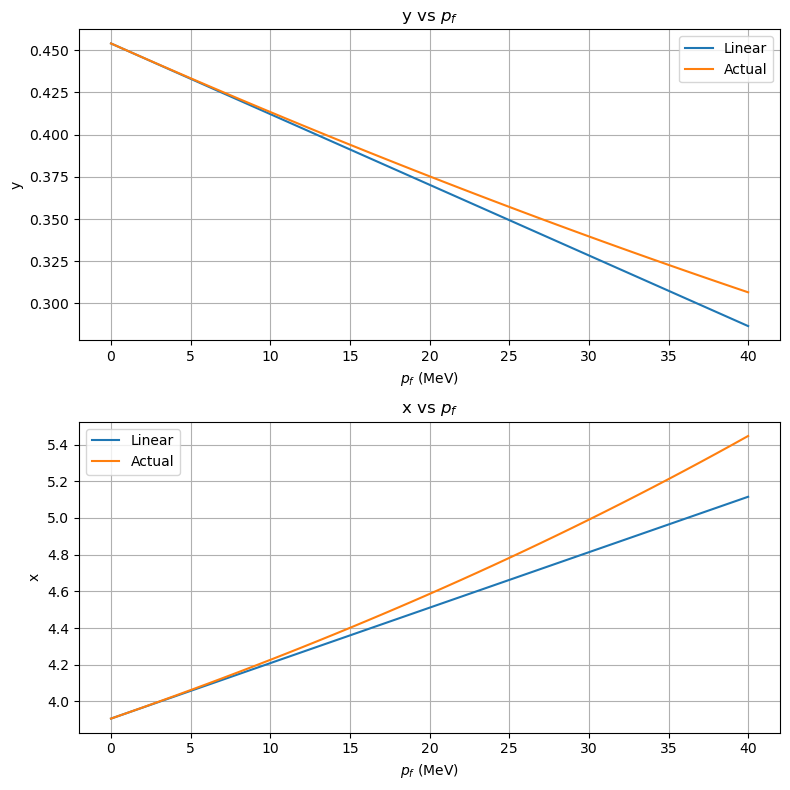

In [20]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

# Plot x(p_f) vs p_f
axes[1].plot(df_lin['p_f'], df_lin['x'], label='Linear')
axes[1].plot(df_act['p_f'], df_act['x'], label='Actual')
axes[1].set_xlabel(r'$p_f$ (MeV)')
axes[1].set_ylabel('x')
axes[1].set_title(r'x vs $p_f$')
axes[1].legend()
axes[1].grid(True)

# Plot y(pf) vs p_f
axes[0].plot(df_lin['p_f'], df_lin['y'], label='Linear')
axes[0].plot(df_act['p_f'], df_act['y'], label='Actual')
axes[0].set_xlabel(r'$p_f$ (MeV)')
axes[0].set_ylabel('y')
axes[0].set_title(r'y vs $p_f$')
axes[0].legend()
axes[0].grid(True)

plt.tight_layout()
plt.show()

### Plot the Z and N Values Against p_f

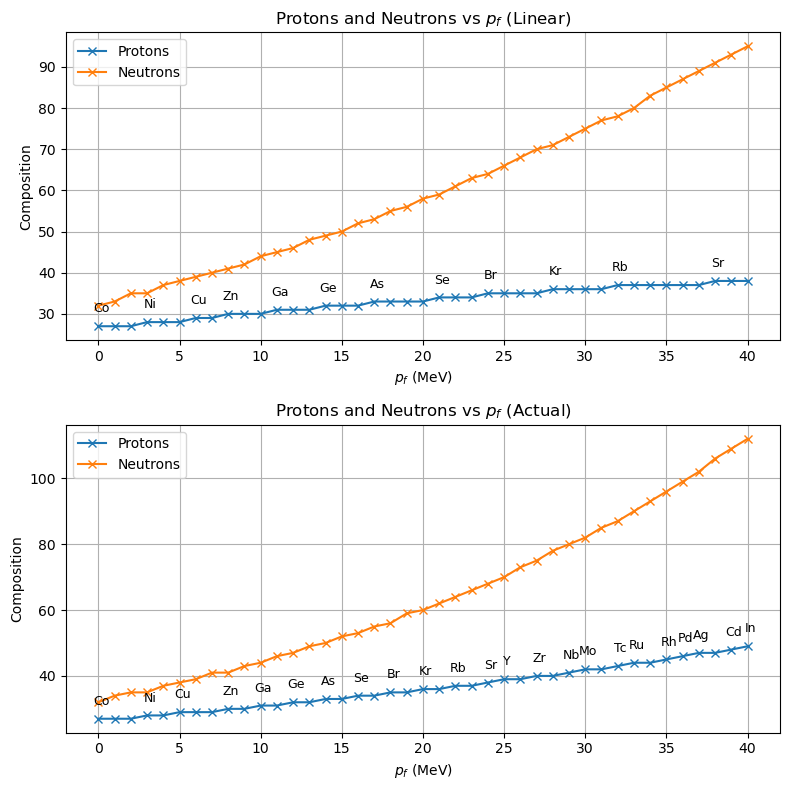

In [21]:
# Create a list with nucleus names and their Z number
nucleus_names = {
    27: "Co", 28: "Ni", 29: "Cu", 30: "Zn", 31: "Ga", 32: "Ge", 33: "As", 34: "Se", 
    35: "Br", 36: "Kr", 37: "Rb", 38: "Sr", 39: "Y", 40: "Zr", 41: "Nb", 42: "Mo", 
    43: "Tc", 44: "Ru", 45: "Rh", 46: "Pd", 47: "Ag", 48: "Cd", 49: "In"
}

# Create a figure with 2 subplots
fig2, axes2 = plt.subplots(2, 1, figsize=(8, 8))

# Plot Z and N vs p_f for linear approximation data
axes2[0].plot(df_lin['p_f'], df_lin['Z'], label='Protons', marker='x')
axes2[0].plot(df_lin['p_f'], df_lin['N'], label='Neutrons', marker='x')
axes2[0].set_xlabel(r'$p_f$ (MeV)')
axes2[0].set_ylabel('Composition')
axes2[0].set_title(r'Protons and Neutrons vs $p_f$ (Linear)')
axes2[0].legend()
axes2[0].grid(True)

# Add nucleus names to Z numbers in plot
previous_nucleus = None  
for i, z_val in enumerate(df_lin['Z']):
    nucleus = nucleus_names.get(z_val)
    if nucleus != previous_nucleus:  
        axes2[0].annotate(nucleus, (df_lin['p_f'][i], df_lin['Z'][i]),
                          textcoords="offset points", xytext=(2, 10), ha='center', fontsize=9)
        previous_nucleus = nucleus  

# Plot Z and N vs p_f for actual numerical solution data
axes2[1].plot(df_act['p_f'], df_act['Z'], label='Protons', marker='x')
axes2[1].plot(df_act['p_f'], df_act['N'], label='Neutrons', marker='x')
axes2[1].set_xlabel(r'$p_f$ (MeV)')
axes2[1].set_ylabel('Composition')
axes2[1].set_title(r'Protons and Neutrons vs $p_f$ (Actual)')
axes2[1].legend()
axes2[1].grid(True)

# Add nucleus names to Z numbers in plot
previous_nucleus = None  
for i, z_val in enumerate(df_act['Z']):
    nucleus = nucleus_names.get(z_val)
    if nucleus != previous_nucleus:
        axes2[1].annotate(nucleus, (df_act['p_f'][i], df_act['Z'][i]),
                          textcoords="offset points", xytext=(2, 10), ha='center', fontsize=9)
        previous_nucleus = nucleus  


plt.tight_layout()
plt.show()

# Compute Baryon Density n and Density rho

In [22]:
def cal_n(p_f):
    n = (p_f/hbar_c)**3 / (3*np.pi**2) # fermi^(-3)
    return n

def cal_rho(n, m):
    n_cm = n * 10**39 # cm^(-3)
    m_g = m * 1.783 * 10**(-27) # g
    rho = n_cm * m_g / 10**11 # 10^11 * g/cm^3
    return rho

In [23]:
# Calculate n and rho for linear approximation data
for idx, row in df_lin.iterrows():
    pf = row['p_f']
    A = row['A']
    Z = row['Z']
    
    # Calculate n, m and rho for each row
    n = cal_n(pf)
    _,_,m = cal_add_val(A, Z)
    rho = cal_rho(n, m)
    
    # Assign the calculated values to dataframe
    df_lin.at[idx, 'n'] = n
    df_lin.at[idx, 'rho'] = rho

# Calculate n and rho for actual numerical solution data
for idx, row in df_act.iterrows():
    pf = row['p_f']
    A = row['A']
    Z = row['Z']
    
    # Calculate n, m and rho for each row
    n = cal_n(pf)
    _,_,m = cal_add_val(A, Z)
    rho = cal_rho(n, m)
    
    # Assign the calculated values to the dataframe
    df_act.at[idx, 'n'] = n
    df_act.at[idx, 'rho'] = rho

# Display the updated dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("Collected linear approximation data: \n",df_lin.to_string(index=False),"\n")
print("Collected actual numerical solution data: \n",df_act.to_string(index=False))

Collected linear approximation data: 
  p_f                x                 y   A  Z  N                Ε            n      rho
   0 3.90612256142565 0.454045763398788  59 27 32 930.194479451994 0.000000e+00 0.000000
   1 3.93635738290829 0.449857779624628  60 27 33 930.443909517047 4.395613e-09 0.000073
   2 3.96659220439094 0.445669795850467  62 27 35 930.690182073013 3.516490e-08 0.000583
   3 3.99682702587358 0.441481812076307  63 28 35 930.933327464715 1.186816e-07 0.001968
   4 4.02706184735622 0.437293828302146  65 28 37 931.173376855367 2.813192e-07 0.004666
   5 4.05729666883887 0.433105844527986  66 28 38 931.410362211710 5.494516e-07 0.009113
   6 4.08753149032151 0.428917860753825  68 29 39 931.644316289902 9.494524e-07 0.015747
   7 4.11776631180415 0.424729876979665  69 29 40 931.875272622123 1.507695e-06 0.025006
   8 4.14800113328680 0.420541893205504  71 30 41 932.103265503894 2.250554e-06 0.037327
   9 4.17823595476944 0.416353909431343  72 30 42 932.328329982070 3.20

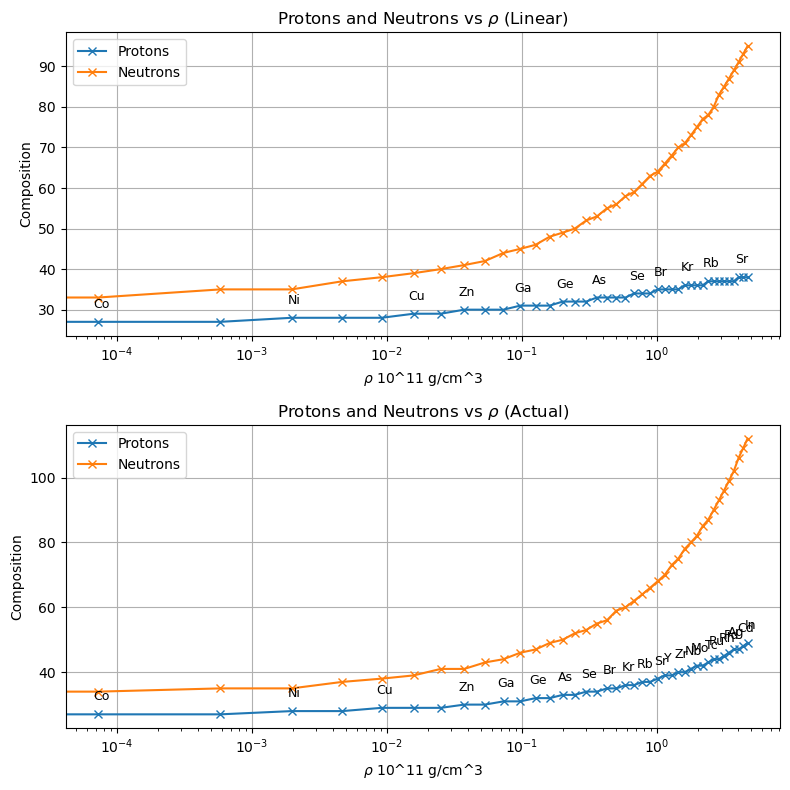

In [24]:
# Create a figure with 2 subplots
fig3, axes3 = plt.subplots(2, 1, figsize=(8, 8))

# Plot Z and N vs p_f for linear approximation data
axes3[0].plot(df_lin['rho'], df_lin['Z'], label='Protons', marker='x')
axes3[0].plot(df_lin['rho'], df_lin['N'], label='Neutrons', marker='x')
axes3[0].set_xlabel(r'$\rho$ 10^11 g/cm^3')
axes3[0].set_ylabel('Composition')
axes3[0].set_title(r'Protons and Neutrons vs $\rho$ (Linear)')
axes3[0].legend()
axes3[0].grid(True)
axes3[0].set_xscale('log')

# Add nucleus names to Z numbers in plot
previous_nucleus = None  
for i, z_val in enumerate(df_lin['Z']):
    nucleus = nucleus_names.get(z_val)
    if i == 0: # skip first value
        continue
    if nucleus != previous_nucleus:  
        axes3[0].annotate(nucleus, (df_lin['rho'][i], df_lin['Z'][i]),
                          textcoords="offset points", xytext=(2, 10), ha='center', fontsize=9)
        previous_nucleus = nucleus  

# Plot Z and N vs p_f for actual numerical solution data
axes3[1].plot(df_act['rho'], df_act['Z'], label='Protons', marker='x')
axes3[1].plot(df_act['rho'], df_act['N'], label='Neutrons', marker='x')
axes3[1].set_xlabel(r'$\rho$ 10^11 g/cm^3')
axes3[1].set_ylabel('Composition')
axes3[1].set_title(r'Protons and Neutrons vs $\rho$ (Actual)')
axes3[1].legend()
axes3[1].grid(True)
axes3[1].set_xscale('log')

# Add nucleus names to Z numbers in plot
previous_nucleus = None  
for i, z_val in enumerate(df_act['Z']):
    nucleus = nucleus_names.get(z_val)
    if i == 0: # skip value
        continue
    if nucleus != previous_nucleus:
        axes3[1].annotate(nucleus, (df_act['rho'][i], df_act['Z'][i]),
                          textcoords="offset points", xytext=(2, 10), ha='center', fontsize=9)
        previous_nucleus = nucleus  


plt.tight_layout()
plt.show()